<a href="https://colab.research.google.com/github/Hsadikot95S/Hotel-Cancellation-Prediction-Using-Neural-Network/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Hotel Booking Cancellation

# Problem Statement

Tripadvisor has reached out to you. They are dealing with a significant number of last-minute
cancellations, therefore they have collected data on each booking. They want to improve the
service and are seeking for a way to do it. Your job as an ML Engineer is to forecast whether or
not they will cancel the booking based on the features. Predictions must be made using a Neural
Network.

# Import Libraries

In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import re
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.callbacks import EarlyStopping
import os
RANDOM_STATE = 42

# We change the directory to the directory where the files are stored

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
df=pd.read_csv('/content/drive/MyDrive/hotel_booking.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


# Import the data

In [13]:
df.shape

(119390, 36)

In [14]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [15]:
# Reset the Index
df.reset_index(inplace=True)

# Data Cleaning and Processing

We see that the column names in the data are uppercase and lowercase mixed. Hence we convert all of them to lowercase characters

We also remove the unnecessary spaces between column names if necessary 

We also change the column phone-number to phone_number since it is consistent with our column naming nomenclature


In [16]:
df.columns= df.columns.str.lower()
df.head()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [17]:
df.columns=df.columns.str.strip()
df.columns = df.columns.str.replace('- ', '_')


# Check for missing values in the dataset

In [18]:
df.isnull().sum()


index                                  0
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent           

# We observe the following:

country column contains 488 missing values
children column has 4 missing values
agent column has 16340 missing values
company column has 112593 missing values

For company and agent column we change the null values to No Agent and No Company respectively

We also observe that there are only 4 values which are missing from the children column.Our dataset contains 119390 Values. Since 4 values represent only a very small fraction of our dataset we can safely discard it

Also we replace the null values in the country column to Unknown 

In [19]:
# Making the changes in agent column

df["agent"].fillna("No Agent", inplace = True)

# Making the changes in company column

df['company'].fillna('No Company',inplace=True)

# Making the necessary changes in country column

df['country'].fillna("unknown", inplace=True)

# Making the necessary changes in children column

df.dropna(subset=['children'], inplace=True)

df.head()



,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [20]:
# We again check if there are null values present 

df.isnull().sum().sum()


0

In [21]:
# We check datatypes of the columns

In [22]:
df.dtypes


index                               int64
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                      

# We do the following 

We change the children to int datatype

Also we change the reservation status date to datetime type



In [23]:
# Changing children to integer type: 
df['children'] = df['children'].astype(int)

# Changing reservation status date to datetime type: 
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Feature Engineering

The original dataset provides a custumer's arrival date with day, month, and year each in a separate feature. For analysis purposes, it is easier to have all of those elements combined into one arrival_date feature.

After we have done this we remove the day,month,yea,columns from the df

In [24]:
df['arrival_date'] = df['arrival_date_year'].astype(str) + "-" + df['arrival_date_month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}).astype(str) + "-" + df['arrival_date_day_of_month'].astype(str)

df['arrival_date'] = pd.to_datetime(df['arrival_date'], format="%Y-%m-%d")


df.head()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,arrival_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,2015-07-01
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,2015-07-01
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,2015-07-01
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,2015-07-01
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2015-07-01


# We see that

arrival date is the date at which customer arrives at the hotel

reservation status date is the date at which an status update was made in the system

For cancelled customers it represents the date at which the customer cancelled the booking. For customers who did not cancell it represents the checkout date.

Hence calculating the difference between the reservation status date and arrival date gives us how many days before the customer cancells for cancellation or how many days the customer stayed at the hotel for non cancelled types

In [25]:
# Creating a new feature representing length of stay or how many days before arrival did the customer cancel:
df['status_minus_arrival_date'] = np.abs(df['arrival_date'] - df['reservation_status_date']).astype(str)
# formating the feature 
def format_lenght(date):
    return date[0]
df['status_minus_arrival_date'] = df['status_minus_arrival_date'].map(format_lenght).astype(int)

df.head()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,arrival_date,status_minus_arrival_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,2015-07-01,0
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,2015-07-01,0
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,2015-07-01,1
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,2015-07-01,1
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2015-07-01,2


In [26]:
# Checking for duplicates: 
df[df.duplicated(keep='first')]

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,arrival_date,status_minus_arrival_date


In [27]:
# Our data contains no duplicates

# We perform EDA

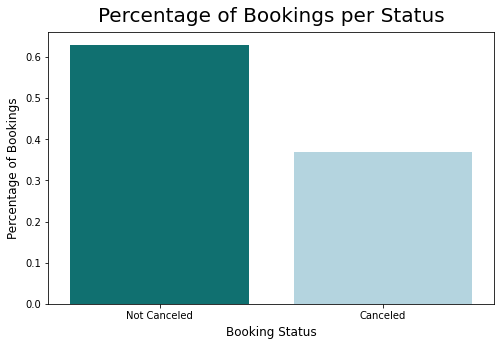

In [28]:
# Visualizing the percentage of canceled vs not canceled bookings: 
plt.figure(figsize=(8,5)) 
plt.title("Percentage of Bookings per Status", fontsize = 20, pad = 10)
sns.barplot(x=df['is_canceled'].unique(), y=df['is_canceled'].value_counts(normalize=True), palette=['teal', 'lightblue'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

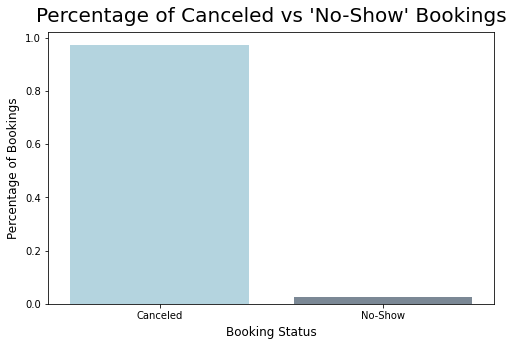

In [29]:
# Visualizing the percentage of bookings canceled prior to arrival: 
plt.figure(figsize=(8,5)) 
plt.title("Percentage of Canceled vs 'No-Show' Bookings", fontsize = 20, pad = 10)
sns.barplot(x=df[df['is_canceled']==1]['reservation_status'].unique(), y=df[df['is_canceled']==1]['reservation_status'].value_counts(normalize=True), palette=['lightblue', 'lightslategrey'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings", fontsize = 12, labelpad = 5);

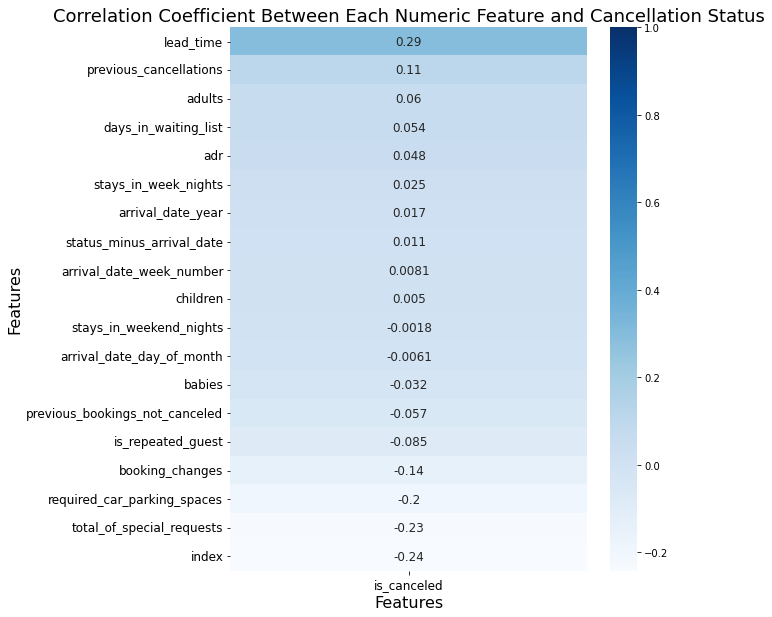

In [30]:
# Visualizing correlation coefficients between features and cancellation:
fig = plt.figure(figsize=(8,10))
ax = sns.heatmap(df.corr()[['is_canceled']].sort_values('is_canceled', ascending=False), annot = True, annot_kws = {"size":12}, cmap='Blues')
ax.set_title('Correlation Coefficient Between Each Numeric Feature and Cancellation Status', fontsize=18)
ax.set_xlabel('Features', fontsize = 16)
ax.set_ylabel('Features', fontsize = 16)
ax.tick_params(axis = "both", labelsize = 12);
y_min, y_max = ax.get_ylim()
ax.set_ylim(top=y_max+1);

From above we observe that:

1. Lead time is the most related with cancellation. This is because more the number of days between the arrival and booking more is the time which is given to the customer to select other options. 


2. The total number of special requests is the second feature most related to correlation. This suggests that the customers expect the hotels to make them feel if their needs are being heard

3. As the number of car parking space increases the cancellation decreases. This means that customers use personal transport more than the public transport which may suggest that they come from nearby areas

4. It does not matter if the customer is previously booked or not and hence efforts and discounts given to existing customers may not be benificial

5. We see that if the customer has cancelled previously there is a high chance that he may cancell in the future too


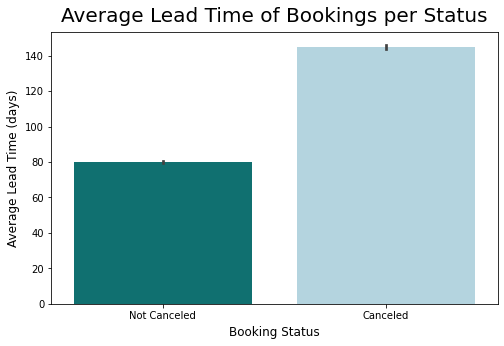

In [31]:
# Visualizing the average lead time for canceled and not canceled bookings:
plt.figure(figsize=(8,5)) 
plt.title("Average Lead Time of Bookings per Status", fontsize = 20, pad = 10)
sns.barplot(x=df['is_canceled'], y=df['lead_time'], palette=['teal', 'lightblue'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Lead Time (days)", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

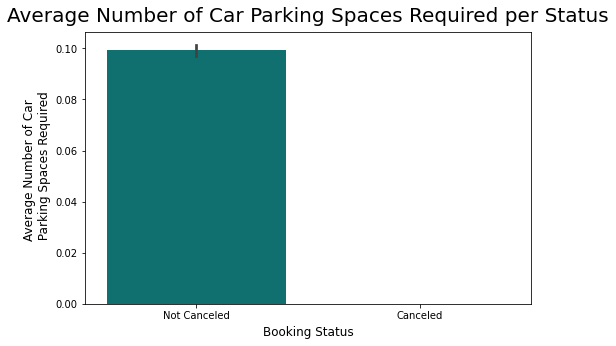

In [32]:
# Visualizing the total number of requested parking spaces for canceled and not canceled bookings:
plt.figure(figsize=(8,5)) 
plt.title("Average Number of Car Parking Spaces Required per Status", fontsize = 20, pad = 10)
sns.barplot(x=df['is_canceled'], y=df['required_car_parking_spaces'], palette=['teal', 'lightblue'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Number of Car \n Parking Spaces Required", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

In [33]:
# Created a dataframe of canceled bookings for plotting purposes
canceled = df[df['is_canceled']==1][['arrival_date']]
canceled.set_index('arrival_date', inplace=True)
canceled['count'] = 1
canceled=canceled.resample('M').sum()

# Created a dataframe of not canceled bookings for plotting purposes
not_canceled = df[df['is_canceled']==0][['arrival_date']]
not_canceled.set_index('arrival_date', inplace=True)
not_canceled['count'] = 1
not_canceled=not_canceled.resample('M').sum()

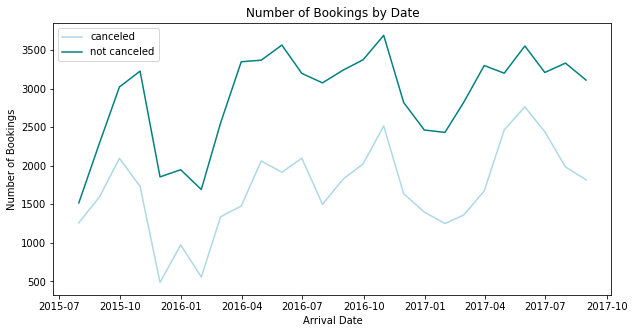

In [34]:
# Visualizing the number of canceled and not canceled bookings by date:
plt.figure(figsize=(10,5))
sns.lineplot(x=canceled.index, y=canceled['count'], color='lightblue')
sns.lineplot(x=not_canceled.index, y=not_canceled['count'], color='teal')
plt.ylabel('Number of Bookings')
plt.xlabel('Arrival Date')
plt.title('Number of Bookings by Date')
plt.legend(['canceled', 'not canceled']);

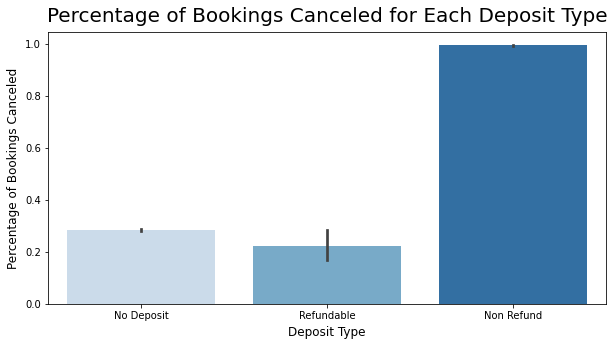

In [35]:
# Visualizing percentage of bookings canceled for each deposit type:
plt.figure(figsize=(10,5)) 
plt.title("Percentage of Bookings Canceled for Each Deposit Type", fontsize = 20, pad = 10)
sns.barplot(x=df['deposit_type'], y=df['is_canceled'], palette='Blues')
plt.xlabel("Deposit Type", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings Canceled", fontsize = 12, labelpad = 5);

In [36]:
df.groupby(df['deposit_type']).describe(include='all')

/usr/local/lib/python3.7/dist-packages/pandas/core/groupby/groupby.py:1973: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  result = self.apply(lambda x: x.describe(**kwargs))


index                                                         \
                 count unique top freq first last          mean           std   
deposit_type                                                                    
No Deposit    104637.0    NaN NaN  NaN   NaN  NaN  60112.165544  35952.065039   
Non Refund     14587.0    NaN NaN  NaN   NaN  NaN  57133.438061  20503.693968   
Refundable       162.0    NaN NaN  NaN   NaN  NaN  20994.580247  21984.933888   

                                ... status_minus_arrival_date             \
                 min       25%  ...                      freq first last   
deposit_type                    ...                                        
No Deposit       0.0  28004.00  ...                       NaN   NaN  NaN   
Non Refund    2133.0  50639.50  ...                       NaN   NaN  NaN   
Refundable    1559.0   4777.25  ...                       NaN   NaN  NaN   

                                                           
                  mean       std  min  25%  50%  75%  max  
deposit_type                                               
No Deposit    3.062263  2.104257  0.0  1.0  3.0  4.0  9.0  
Non Refund    3.181669  2.347510  0.0  1.0  2.0  5.0  9.0  
Refundable    3.370370  1.949323  0.0  2.0  3.0  4.0  7.0  

[3 rows x 494 columns]

In [37]:
df.describe()


,index,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,status_minus_arrival_date
count,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000
mean,59695.133843,0.370395,104.014801,2016.156593,27.165003,15.798553,0.927605,2.500310,1.856390,0.103890,0.007949,0.031913,0.087121,0.137102,0.221131,2.321227,101.833541,0.062520,0.571340,3.077270
std,34465.472040,0.482913,106.863286,0.707456,13.605334,8.780783,0.998618,1.908289,0.579261,0.398561,0.097438,0.175770,0.844350,1.497462,0.652315,17.595011,50.534664,0.245295,0.792798,2.135633
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,29846.250000,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000,1.000000
50%,59696.500000,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.590000,0.000000,0.000000,3.000000
75%,89542.750000,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,4.000000
max,119389.000000,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,9.000000


In [38]:
X = df.drop(columns=['is_canceled', 'reservation_status', 'agent', 'company', 'country', 'reservation_status_date', 'arrival_date'])



In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119386 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   index                           119386 non-null  int64  
 1   hotel                           119386 non-null  object 
 2   lead_time                       119386 non-null  int64  
 3   arrival_date_year               119386 non-null  int64  
 4   arrival_date_month              119386 non-null  object 
 5   arrival_date_week_number        119386 non-null  int64  
 6   arrival_date_day_of_month       119386 non-null  int64  
 7   stays_in_weekend_nights         119386 non-null  int64  
 8   stays_in_week_nights            119386 non-null  int64  
 9   adults                          119386 non-null  int64  
 10  children                        119386 non-null  int64  
 11  babies                          119386 non-null  int64  
 12  meal            

In [40]:
df=df.drop(columns=['name','email','phone-number','credit_card','hotel'])


In [41]:
df = pd.get_dummies(df, columns=['arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type'])


In [42]:
df.head()

,index,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,0,342,2015,27,1,0,0,2,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,737,2015,27,1,0,0,2,0,...,0,0,0,1,0,0,0,0,1,0
2,2,0,7,2015,27,1,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
3,3,0,13,2015,27,1,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
4,4,0,14,2015,27,1,0,2,2,0,...,0,0,0,1,0,0,0,0,1,0


In [43]:
X = df.drop(columns=['is_canceled','reservation_status', 'agent', 'company', 'country', 
                     'reservation_status_date', 'arrival_date'])
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE, stratify=y, test_size=0.35)


In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = MinMaxScaler()


In [46]:
X_train = scaler.fit_transform(X_train)


In [47]:
X_test = scaler.fit_transform(X_test)


In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [49]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw


# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Add early stopping
es = EarlyStopping(monitor='val_loss', patience=5) 


# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [50]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
304/304 [==============================] - 2s 5ms/step - loss: 0.4636 - val_loss: 0.3542
Epoch 2/25
304/304 [==============================] - 1s 4ms/step - loss: 0.3257 - val_loss: 0.3266
Epoch 3/25
304/304 [==============================] - 1s 4ms/step - loss: 0.2686 - val_loss: 0.3628
Epoch 4/25
304/304 [==============================] - 1s 4ms/step - loss: 0.2323 - val_loss: 0.3944
Epoch 5/25
304/304 [==============================] - 2s 7ms/step - loss: 0.2009 - val_loss: 0.2897
Epoch 6/25
304/304 [==============================] - 3s 9ms/step - loss: 0.1666 - val_loss: 0.2366
Epoch 7/25
304/304 [==============================] - 3s 8ms/step - loss: 0.1332 - val_loss: 0.2091
Epoch 8/25
304/304 [==============================] - 3s 9ms/step - loss: 0.1108 - val_loss: 0.1856
Epoch 9/25
304/304 [==============================] - 3s 8ms/step - loss: 0.0985 - val_loss: 0.1418
Epoch 10/25
304/304 [==============================] - 2s 8ms/step - loss: 0.0889 - val_loss: 0.1569

In [51]:
losses = pd.DataFrame(model.history.history)


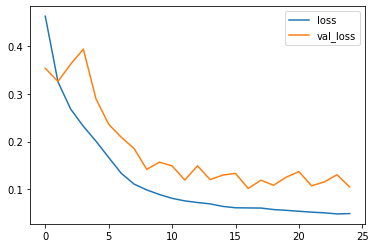

In [52]:
losses[['loss','val_loss']].plot()


In [53]:
from sklearn.metrics import classification_report,confusion_matrix


In [54]:
predictions =np.argmax(model.predict(X_test), axis=1)


In [55]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.63      1.00      0.77     26309
           1       0.00      0.00      0.00     15477

    accuracy                           0.63     41786
   macro avg       0.31      0.50      0.39     41786
weighted avg       0.40      0.63      0.49     41786



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
